In [1]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [2]:
X_train = np.load("train_images.npy") # La cantidad total de imágenes
Y_train = np.load("train_labels.npy")

print(f"Imagenes de entrenamiento: {X_train.shape}")
print(f"Número de clases: {np.unique(Y_train)}")

Imagenes de entrenamiento: (60000, 28, 28)
Número de clases: [0 1 2 3 4 5 6 7 8 9]


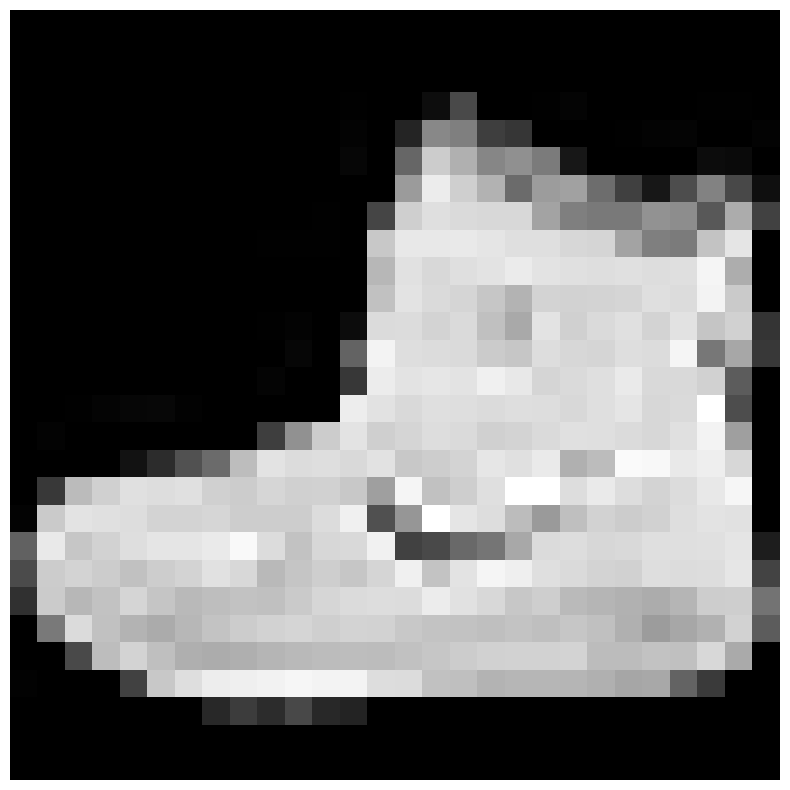

In [3]:
plt.figure(figsize=(10,10)) 
plt.imshow(X_train[0,:,:], cmap="gray") # Primer parámetor es el índice, en este caso la primer imágen
plt.axis("off") # Para que aparezcan las numeraciones en los ejes
plt.show() # Mostrar la imágen

In [4]:
# Crear un modelo secuencial correctamente
model = keras.Sequential([
    keras.layers.Input((28, 28, 1)),
    keras.layers.Conv2D(6,5, padding="same", strides=1, activation="relu"), # Empiricamente el profe dice que esta mejor comenzar con 32
    # El padding es para igualar el tamaño de la imágen de salida al de la imágen de entrada
    # El strinde de 1 es recomendable para clasificación
    keras.layers.MaxPooling2D(), # El valor del producto de cada matriz por el filtro que salga tomamos el mas grande
    keras.layers.Conv2D(6,2, padding="same", strides=2),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16,5, padding="same", strides=1, activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16,2, padding="same", strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(120),
    keras.layers.Dense(84),
    keras.layers.Dense(10, activation="softmax")
])

# Imprimir el resumen del modelo
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 6)        │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 6)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 1, 1, 16)       │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │         2,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,816 (65.69 KB)

 Trainable params: 16,816 (65.69 KB)

 Non-trainable params: 0 (0.00 B)

None


In [5]:
X_train = np.expand_dims(X_train, axis=-1)
print(X_train.shape)

(60000, 28, 28, 1)


In [6]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs=50, batch_size=32)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7039 - loss: 0.8702
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8103 - loss: 0.5222
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8277 - loss: 0.4734
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8377 - loss: 0.4467
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8427 - loss: 0.4275
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8486 - loss: 0.4158
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8498 - loss: 0.4043
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8558 - loss: 0.3948
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8571 - loss: 0.3863
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8587 - loss: 0.3834
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8594 - loss: 0.3783
Epoch 12/50
1875/1875 ━━━━━━━━

In [7]:
X_test = np.load("test_images.npy")
Y_test = np.load("test_labels.npy")

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)
print(((predictions == Y_test).sum()/len(Y_test))*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
86.58
